### Page Rank

PageRank is Google’s popular search algorithm. PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites

PageRank is defined in the original Google paper as follows:

We assume page A has pages T1…Tn which point to it (i.e., are citations). The parameter d is a damping factor which can be set between 0 and 1. We usually set d to 0.85. Also C(A) is defined as the number of links going out of page A. The PageRank of a page A is given as follows:

PR(A) = (1-d) + d (PR(T1)/C(T1) + … + PR(Tn)/C(Tn))

Note that the PageRanks form a probability distribution over web pages, so the sum of all web pages' PageRanks will be one.

The underlying mathematics of PageRank has to do with random walks on networks, akin to how random surfers propagate through a network. Precisely, PageRank is an example of a discrete ergodic Markov Chain. Random surfers follow links, but occasionally teleport to random vertices. The PageRank of a node is the probability it is visited by a random surfer with teleportation. PageRank is now widely recognized as a way of detecting central nodes in a network.

### Bidirected graph

Bidirected graph is a directed graph in which the reverse of every relationship is also a relationship.

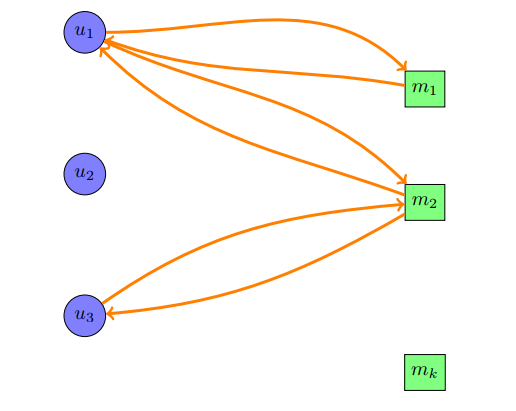

In [1]:
#Loading library
import py2neo as py2neo

In [2]:
#Accessing local Neo4j Server
py2neo.authenticate("localhost:7474", "neo4j", "neo4j")

In [3]:
graph = py2neo.Graph("http://localhost:7474/db/data/")

In [4]:
#Querying triangle number for each node
query = """
call algo.pageRank.stream(
'MATCH (u:Person) WHERE exists( (u)-[:HAS_CONTACT]-() ) RETURN id(u) as id',
'MATCH (u1:Person)-[:HAS_CONTACT]-(u2:Person) RETURN id(u1) as source, id(u2) as target',
{graph:'cypher'}
) yield node,score with node,score order by score desc
return node {.name},score;"""

In [5]:
#Running query 
results = graph.data(query)

In [6]:
#Printing 10 nodes
results[:10]

[{'node': {'name': 'Greg Kinnear'}, 'score': 1.568786},
 {'node': {'name': 'Tony Scott'}, 'score': 1.4721919999999997},
 {'node': {'name': 'Charlize Theron'}, 'score': 1.4589404999999995},
 {'node': {'name': 'Parker Posey'}, 'score': 1.4443460000000004},
 {'node': {'name': 'Liv Tyler'}, 'score': 1.4344860000000001},
 {'node': {'name': 'Rob Reiner'}, 'score': 1.4205035000000001},
 {'node': {'name': 'Bill Paxton'}, 'score': 1.3683645},
 {'node': {'name': 'Philip Seymour Hoffman'}, 'score': 1.364463},
 {'node': {'name': 'Richard Harris'}, 'score': 1.3484405},
 {'node': {'name': 'Frank Darabont'}, 'score': 1.3393795000000004}]

In [7]:
#Querying triangle number for each node
query = """
call algo.pageRank.stream(
'MATCH (u:Person) WHERE exists( (u)-[:HAS_CONTACT]-() ) RETURN id(u) as id',
'MATCH (u1:Person)-[:HAS_CONTACT]-(u2:Person) RETURN id(u1) as source, id(u2) as target',
{graph:'cypher',iterations:100}
) yield node,score with node,score order by score desc
return node {.name},score;"""

In [8]:
#Running query 
results = graph.data(query)

In [9]:
#Printing 10 nodes
results[:10]

[{'node': {'name': 'Greg Kinnear'}, 'score': 1.605727},
 {'node': {'name': 'Tony Scott'}, 'score': 1.5064299999999997},
 {'node': {'name': 'Charlize Theron'}, 'score': 1.4931784999999995},
 {'node': {'name': 'Parker Posey'}, 'score': 1.4776829999999999},
 {'node': {'name': 'Liv Tyler'}, 'score': 1.4678229999999997},
 {'node': {'name': 'Rob Reiner'}, 'score': 1.4538404999999996},
 {'node': {'name': 'Bill Paxton'}, 'score': 1.3998995},
 {'node': {'name': 'Philip Seymour Hoffman'}, 'score': 1.395998},
 {'node': {'name': 'Richard Harris'}, 'score': 1.3799755},
 {'node': {'name': 'Frank Darabont'}, 'score': 1.3700135000000002}]

In [10]:
#Querying triangle number for each node
query = """
call algo.pageRank.stream(
'MATCH (u:Person) WHERE exists( (u)-[:HAS_CONTACT]-() ) RETURN id(u) as id',
'MATCH (u1:Person)-[:HAS_CONTACT]-(u2:Person) RETURN id(u1) as source, id(u2) as target',
{graph:'cypher',iterations:1000}
) yield node,score with node,score order by score desc
return node {.name},score;"""

In [11]:
#Running query 
results = graph.data(query)

In [12]:
#Printing 10 nodes
results[:10]

[{'node': {'name': 'Greg Kinnear'}, 'score': 1.605727},
 {'node': {'name': 'Tony Scott'}, 'score': 1.5064299999999997},
 {'node': {'name': 'Charlize Theron'}, 'score': 1.4931784999999995},
 {'node': {'name': 'Parker Posey'}, 'score': 1.4776829999999999},
 {'node': {'name': 'Liv Tyler'}, 'score': 1.4678229999999997},
 {'node': {'name': 'Rob Reiner'}, 'score': 1.4538404999999996},
 {'node': {'name': 'Bill Paxton'}, 'score': 1.3998995},
 {'node': {'name': 'Philip Seymour Hoffman'}, 'score': 1.395998},
 {'node': {'name': 'Richard Harris'}, 'score': 1.3799755},
 {'node': {'name': 'Frank Darabont'}, 'score': 1.3700135000000002}]

In [13]:
#Querying triangle number for each node
query = """
call algo.pageRank.stream(
'MATCH (u:Person) WHERE exists( (u)-[:HAS_CONTACT]-() ) RETURN id(u) as id',
'MATCH (u1:Person)-[:HAS_CONTACT]-(u2:Person) RETURN id(u1) as source, id(u2) as target',
{graph:'cypher',iterations:5000}
) yield node,score with node,score order by score desc
return node {.name},score;"""

In [14]:
#Running query 
results = graph.data(query)

In [15]:
#Printing 10 nodes
results[:10]

[{'node': {'name': 'Greg Kinnear'}, 'score': 1.605727},
 {'node': {'name': 'Tony Scott'}, 'score': 1.5064299999999997},
 {'node': {'name': 'Charlize Theron'}, 'score': 1.4931784999999995},
 {'node': {'name': 'Parker Posey'}, 'score': 1.4776829999999999},
 {'node': {'name': 'Liv Tyler'}, 'score': 1.4678229999999997},
 {'node': {'name': 'Rob Reiner'}, 'score': 1.4538404999999996},
 {'node': {'name': 'Bill Paxton'}, 'score': 1.3998995},
 {'node': {'name': 'Philip Seymour Hoffman'}, 'score': 1.395998},
 {'node': {'name': 'Richard Harris'}, 'score': 1.3799755},
 {'node': {'name': 'Frank Darabont'}, 'score': 1.3700135000000002}]